### 1. Implement K-NN Classifier for classification of any dataset of your choice.
- a. Load an existing data set
- b. Split the data set to train and test sets
- c. Test your model using test set. Find accuracy and confusion Matrix.
- d. Examine the effect of the value of K on accuracy/performance. Plot the curve “k vs accuracy” and find out the value of k for maximum accuracy for the test samples.

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df=pd.read_csv('dataset_classification_animal_zoo.csv')

In [3]:
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,4.0,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,4.0,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,0.0,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,4.0,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,4.0,True,False,True,mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,vulture,False,True,True,False,True,False,True,False,True,True,False,False,2.0,True,False,True,bird
96,wallaby,True,False,False,True,False,False,False,True,True,True,False,False,2.0,True,False,True,mammal
97,wasp,True,False,True,False,True,False,False,False,False,True,True,False,6.0,False,False,False,insect
98,wolf,True,False,False,True,False,False,True,True,True,True,False,False,4.0,True,False,True,mammal


In [4]:
df = df.drop(['legs'], axis=1)

In [5]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,tail,domestic,catsize,class_type
0,aardvark,True,False,False,True,False,False,True,True,True,True,False,False,False,False,True,mammal
1,antelope,True,False,False,True,False,False,False,True,True,True,False,False,True,False,True,mammal
2,bass,False,False,True,False,False,True,True,True,True,False,False,True,True,False,False,fish
3,bear,True,False,False,True,False,False,True,True,True,True,False,False,False,False,True,mammal
4,boar,True,False,False,True,False,False,True,True,True,True,False,False,True,False,True,mammal


In [6]:
columns = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous','tail', 'fins', 'domestic', 'catsize']

label_encoder = LabelEncoder()

for column in columns:
    df[column] = label_encoder.fit_transform(df[column])

print(df.head())

  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  tail  domestic  catsize  \
0        1         1         1         0     0     0         0        1   
1        1         1         1         0     0     1         0        1   
2        1         1         0         0     1     1         0        0   
3        1         1         1         0     0     0         0        1   
4        1         1         1         0     0     1         0        1   

  class_type  
0     mammal  
1     mammal  
2       fish  
3     mammal  
4     mammal  


In [7]:
features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'tail', 'fins', 'domestic', 'catsize']

X = df[features]
y = df['class_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:

def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def knn_predict(train_data, train_labels, test_point, k):
    distances = [(euclidean_distance(test_point, train_data.iloc[i]), train_labels.iloc[i]) for i in range(len(train_data))]
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_labels = [label for _, label in sorted_distances[:k]]
    most_common_label = max(set(k_nearest_labels), key=k_nearest_labels.count)
    return most_common_label

def knn_classifier(X_train, y_train, X_test, k):
    predictions = [knn_predict(X_train, y_train, test_point, k) for _, test_point in X_test.iterrows()]
    return predictions

k_neighbors = 3

y_pred = knn_classifier(X_train, y_train, X_test, k_neighbors)


In [9]:

def accuracy_score(y_true, y_pred):
    correct_predictions = sum(1 for true, pred in zip(y_true, y_pred) if true == pred)
    total_samples = len(y_true)
    return correct_predictions / total_samples

def confusion_matrix(y_true, y_pred, classes):
    class_list = classes.tolist()  # Convert numpy array to list
    matrix = np.zeros((len(class_list), len(class_list)), dtype=int)
    for true, pred in zip(y_true, y_pred):
        matrix[class_list.index(true)][class_list.index(pred)] += 1
    return matrix


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test.tolist(), y_pred, df['class_type'].unique())

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.90
Confusion Matrix:
 [[9 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 2 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0]
 [0 1 1 0 0 0 1]]


Accuracy for k=1: 0.95
Accuracy for k=2: 0.95
Accuracy for k=3: 0.90
Accuracy for k=4: 0.90
Accuracy for k=5: 0.90
Accuracy for k=6: 0.90
Accuracy for k=7: 0.90
Accuracy for k=8: 0.85
Accuracy for k=9: 0.85
Accuracy for k=10: 0.85
Accuracy for k=11: 0.85
Accuracy for k=12: 0.85
Accuracy for k=13: 0.85
Accuracy for k=14: 0.85
Accuracy for k=15: 0.85
Accuracy for k=16: 0.85
Accuracy for k=17: 0.85
Accuracy for k=18: 0.85
Accuracy for k=19: 0.85
Accuracy for k=20: 0.85
Accuracy for k=21: 0.85
Accuracy for k=22: 0.85
Accuracy for k=23: 0.80
Accuracy for k=24: 0.80
Accuracy for k=25: 0.80
Accuracy for k=26: 0.80
Accuracy for k=27: 0.80
Accuracy for k=28: 0.80
Accuracy for k=29: 0.80
Accuracy for k=30: 0.80
Accuracy for k=31: 0.75
Accuracy for k=32: 0.75
Accuracy for k=33: 0.70
Accuracy for k=34: 0.70
Accuracy for k=35: 0.65
Accuracy for k=36: 0.60
Accuracy for k=37: 0.60
Accuracy for k=38: 0.60
Accuracy for k=39: 0.50
Accuracy for k=40: 0.50


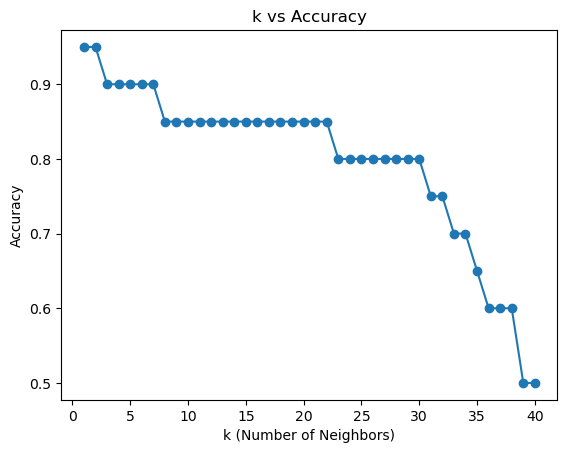

Best accuracy is 0.95 for k=1


In [10]:
import matplotlib.pyplot as plt

def evaluate_knn(X_train, y_train, X_test, y_test, max_k):
    accuracy_values = []
    for k in range(1, max_k + 1):
        y_pred = knn_classifier(X_train, y_train, X_test, k)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_values.append(accuracy)
        print(f"Accuracy for k={k}: {accuracy:.2f}")
    return accuracy_values

max_k = 40

accuracy_values = evaluate_knn(X_train, y_train, X_test, y_test, max_k)

best_k = np.argmax(accuracy_values) + 1

plt.plot(range(1, max_k + 1), accuracy_values, marker='o')
plt.title('k vs Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.show()

print(f"Best accuracy is {max(accuracy_values):.2f} for k={best_k}")
